In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [5]:
df = pd.read_csv(r"C:\Users\Hamika\Downloads\StudentsPerformance_3_lyst1729690388778.csv")

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
X= df.drop(columns=['math score'],axis=1)

In [13]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [17]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [19]:
y = df['math score']

In [21]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [25]:
#creation of transformer columns:

num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [29]:
num_trans = StandardScaler()
oh_tran = OneHotEncoder()

In [35]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_tran,cat_cols),
        ("StandardScaler",num_trans,num_cols),
    ]
)   

In [37]:
x = preprocessor.fit_transform(X)

In [39]:
x.shape

(1000, 19)

In [41]:
#seperating train and test data:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [43]:
#creating an evaluate function to give all metrics after model training:

def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,mse,rmse,r2

In [49]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set')
    print('– Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('– Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('– R2 Score: {:.4f}'.format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print('– Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('– Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('– R2 Score: {:.4f}'.format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


LR
Model performance for Training set
– Root Mean Squared Error: 5.2592
– Mean Absolute Error: 4.1681
– R2 Score: 0.8815
----------------------------------
Model performance for Test set
– Root Mean Squared Error: 5.6218
– Mean Absolute Error: 4.5734
– R2 Score: 0.8524


Lasso
Model performance for Training set
– Root Mean Squared Error: 6.5500
– Mean Absolute Error: 5.1997
– R2 Score: 0.8162
----------------------------------
Model performance for Test set
– Root Mean Squared Error: 6.5967
– Mean Absolute Error: 5.1005
– R2 Score: 0.7967


Ridge
Model performance for Training set
– Root Mean Squared Error: 5.2594
– Mean Absolute Error: 4.1672
– R2 Score: 0.8815
----------------------------------
Model performance for Test set
– Root Mean Squared Error: 5.6191
– Mean Absolute Error: 4.5672
– R2 Score: 0.8525


KNN
Model performance for Training set
– Root Mean Squared Error: 5.7669
– Mean Absolute Error: 4.5672
– R2 Score: 0.8575
----------------------------------
Model performance for

In [51]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.852517
0,LR,0.852377
5,RF,0.803069
1,Lasso,0.796734
3,KNN,0.763845
4,DT,0.621696


In [53]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 85.24


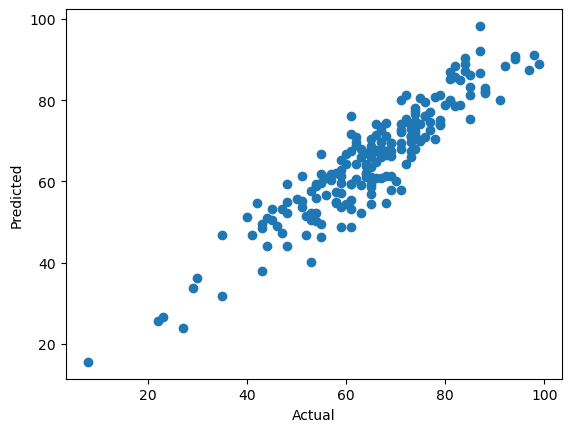

In [55]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math score'>

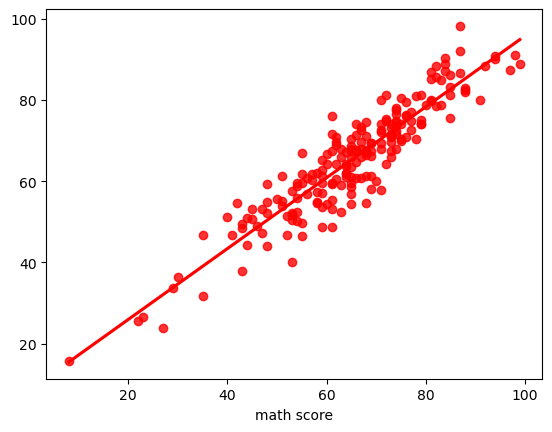

In [57]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [59]:
pred_df = pd.DataFrame({'Actual Value': y_test,'Predicted Value': y_pred,'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
519,67,66.003977,0.996023
837,75,69.919265,5.080735
208,74,67.990259,6.009741
525,68,71.094116,-3.094116
978,55,49.586599,5.413401
...,...,...,...
647,64,61.992020,2.007980
481,52,46.828127,5.171873
134,74,73.568230,0.431770
366,69,57.981808,11.018192
